# 1. Importing necessary libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None) # displaying all rows and columns of a dataframe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Reading the Breast Cancer Wisconsin (Diagnostic) Dataset

In [2]:
# reading the Breast Cancer Wisconsin (Diagnostic) Data Set
df = pd.read_csv('data.csv.xls')

# displaying top 5 instances of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 3. Dropping unwanted columns, 'id' and 'Unnamed: 32' are dropped

In [3]:
# the unwanted columns, 'id' and 'Unnamed: 32' are dropped
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

## 4. Label Encoding of the Target Variable

In [4]:
# label-encoding of the target label, 'diagnosis' such that B(Benign) -> 0 and M (Malignant) -> 1
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

## 5. Creating the Feature Set and Target Label variables

In [5]:
# spliting into X (features) and y (target label)
X = df.iloc[:, 1:]
y = df['diagnosis']

## 6. 80-20 splitting the dataset into Training Set and Test Set

In [16]:
# 80-20 splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8,
                                                    test_size = 0.2, random_state = 42)

## 7. Feature Scaling of the features in the Training and Test Set

In [7]:
# feature scaling of the features in Training and Test Set
columns = X_train.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

## 8. Principal Component Analysis (PCA) to reduce the dimensionality of the data into 2 dimensions in both Training and Test Set

In [9]:
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

## 9. Plotting the Scatter-Plot of Training and Test Set

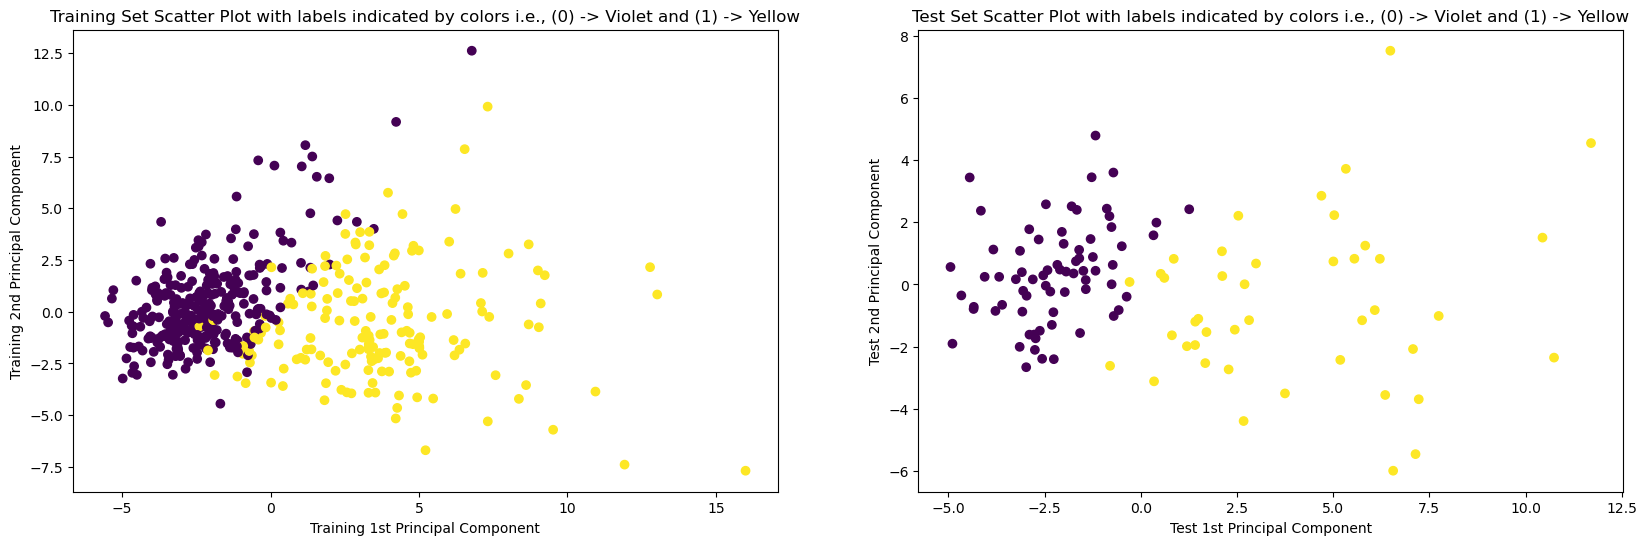

In [10]:
# Scatter Plot of Training and Test Set with labels indicated by colors
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=5)

# training the model
model.fit(X_train_pca,y_train)

knn_classifier

KNeighborsClassifier()

## 13. Obtaining the Training Set and Test Set Predictions given by the model, trained in the last step

In [18]:
# getting the Training Set Predictions
y_train_pred = model.predict(X_train_pca)

# getting the Test Set Predictions
y_test_pred = model.predict(X_test_pca)

## 14. Performance Analysis of the Logistic Regression Model in terms of Accuracy, Precision, Recall and F1-Score

In [19]:
# Getting the Training and Test Accuracy of the Logistic Regression Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_test_pred))
print()

Training Accuracy of the Model:  0.9538461538461539
Test Accuracy of the Model:  0.9736842105263158

Training Precision of the Model:  0.9404761904761905
Test Precision of the Model:  0.9545454545454546

Training Recall of the Model:  0.9349112426035503
Test Recall of the Model:  0.9767441860465116

Training F1-Score of the Model:  0.9376854599406528
Test F1-Score of the Model:  0.9655172413793104



## 15. Plotting the Decision Boundary given by the Trained Logistic Regression both on the Training and Test sets

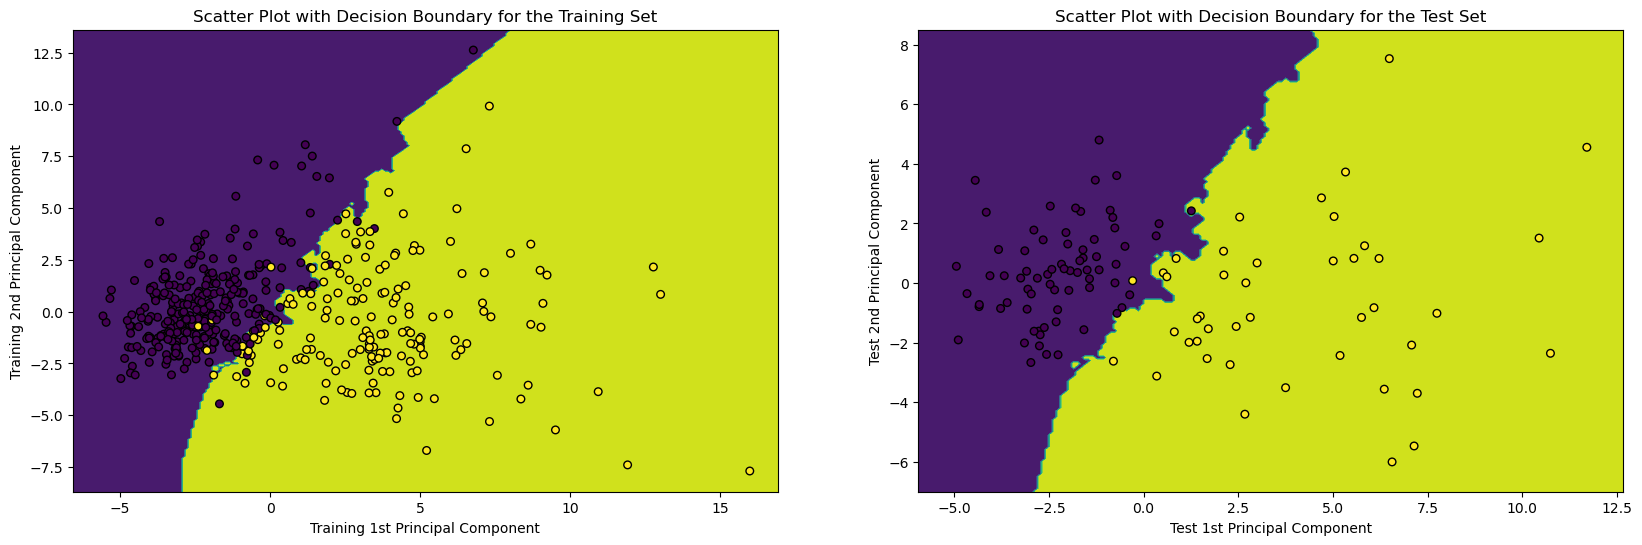

In [20]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()